**Titanic Survival Prediction** 
* The Titanic dataset contains information about passengers on the Titanic, including whether they survived or not. Your goal is to build a model that predicts the survival of passengers based on features like age, sex, class, fare, etc. This is a binary classification problem. You can use algorithms like decision trees, random forests, or support vector machines (SVM) for this project.
[[data]](https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner)

1.import libraries

In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. Read the dataset

In [469]:
train_data=pd.read_csv("d:/csv/titanic/train.csv")
test_data=pd.read_csv("d:/csv/titanic/test.csv")

In [470]:
train_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


3. Data Analysis

In [471]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [472]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [473]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [474]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [475]:
train_data=train_data.dropna()
train_data.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


4. Data Visualization

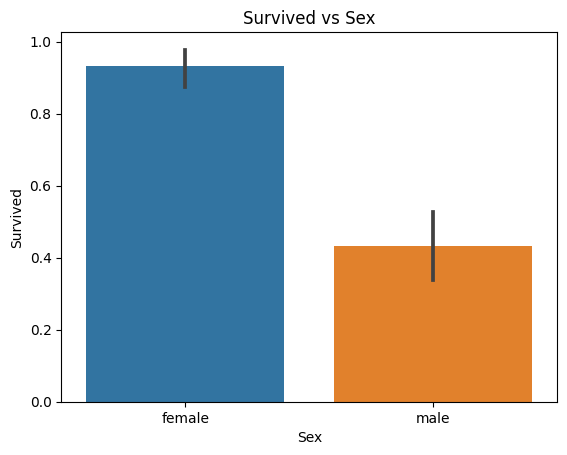

In [476]:
sns.barplot(x="Sex",y="Survived",data=train_data)
plt.title("Survived vs Sex")
plt.show()

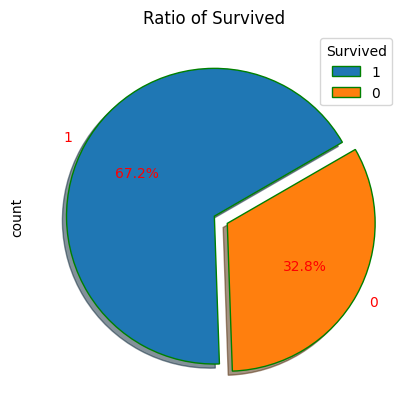

In [489]:
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
train_data["Survived"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',shadow=True,textprops = dict(color ="red"),
                                               startangle = 30,wedgeprops = wp)
plt.legend(title="Survived")
plt.title("Ratio of Survived")
plt.show()

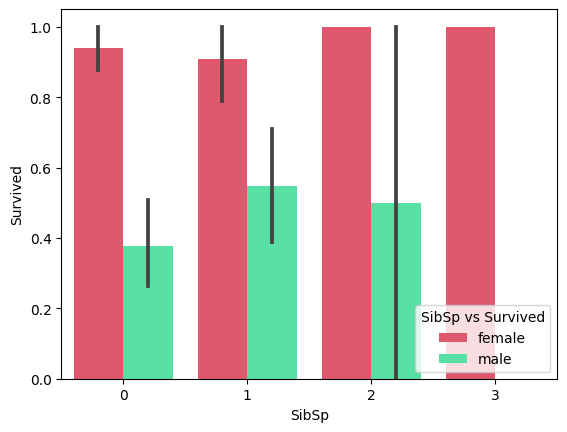

In [478]:
colors = ['#f5425d', '#42f5a7']
sns.barplot(x="SibSp", y="Survived", data=train_data,hue='Sex',palette=colors)
plt.legend(title='SibSp vs Survived')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


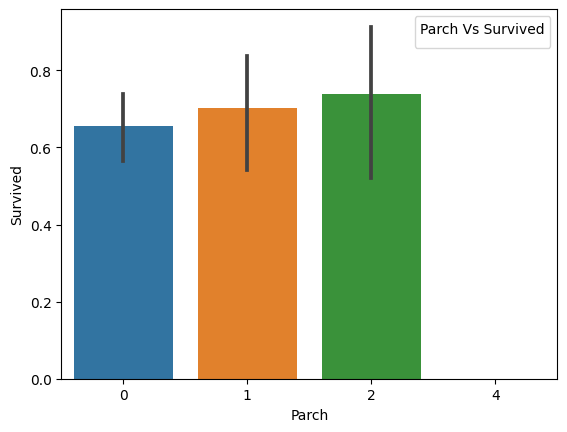

In [479]:
sns.barplot(x='Parch',y='Survived',data=train_data)
plt.legend(title='Parch Vs Survived')
plt.show()

5. Cleaning Data

In [480]:
feature=['Pclass', 'Sex', 'Age', 'Fare'] # Select relevant features
train_data=train_data[feature+['Survived']].dropna()
train_data.head()

,Pclass,Sex,Age,Fare,Survived
1,1,female,38.0,71.2833,1
3,1,female,35.0,53.1000,1
6,1,male,54.0,51.8625,0
10,3,female,4.0,16.7000,1
11,1,female,58.0,26.5500,1


In [481]:
# Convert categorical variables to numerical
train_data['Sex']=train_data['Sex'].map({'female':0,'male':1})
train_data.head()

,Pclass,Sex,Age,Fare,Survived
1,1,0,38.0,71.2833,1
3,1,0,35.0,53.1000,1
6,1,1,54.0,51.8625,0
10,3,0,4.0,16.7000,1
11,1,0,58.0,26.5500,1


In [482]:
X=train_data.drop('Survived',axis='columns')
y=train_data['Survived']

In [483]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

6. Scale the Feature

In [484]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

7. Train the svm model

In [485]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)

SVC()

In [486]:
model.score(x_test,y_test)*100

81.81818181818183

In [487]:
y_pred=model.predict(x_test)

# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.8181818181818182